In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

In [35]:
# Carregar o DataFrame (substitua pelo caminho do seu arquivo)
df = pd.read_csv(r'C:\Users\maype\OneDrive - sga.pucminas.br\Área de Trabalho\Faculdade\projects\A Machine Learning Approach to Characterizing Depression in Brazilian Adult\Data\Bases Modificadas\base_sem_nulos.csv')



In [36]:
df.info(0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55667 entries, 0 to 55666
Data columns (total 44 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Sexo                                            55667 non-null  float64
 1   Apoio_Familiar                                  55667 non-null  float64
 2   Apoio_de_Amigos                                 55667 non-null  float64
 3   Tipo_de_Trabalho                                55667 non-null  float64
 4   Curso_Mais_Elevado                              55667 non-null  float64
 5   Diagnostico_Depressao                           55667 non-null  float64
 6   Estado_de_Saude                                 55667 non-null  float64
 7   Pratica_Exercicio                               55667 non-null  float64
 8   Exercicio_Mais_Frequente                        55667 non-null  float64
 9   Ultima_Consulta_Medica                 

In [37]:
df['Diagnostico_Depressao'].value_counts()

Diagnostico_Depressao
2.0    50603
1.0     5064
Name: count, dtype: int64

In [38]:
colunas_numericas = ['peso_consolidado(KG)', 'altura_consolidada(CM)', 'renda_total', 'IMC']

In [39]:
df[colunas_numericas].describe()

,peso_consolidado(KG),altura_consolidada(CM),renda_total,IMC
count,55667.000000,55667.000000,55667.000000,55667.000000
mean,72.617116,163.662780,1903.299944,143.226638
std,17.278700,20.785952,3993.324946,1070.138819
min,1.000000,1.000000,0.000000,12.908315
25%,62.000000,159.000000,361.000000,23.437500
50%,72.000000,165.000000,1001.000000,26.171875
75%,82.000000,172.000000,2001.000000,29.488704
max,176.000000,206.000000,426001.000000,20000.000000


In [40]:
def remover_outliers(data):
    # 1. Remover outliers grosseiros com Z-score
    outliers_zscore = detectar_outliers_zscore(data, limite_inferior=-4, limite_superior=4)
    data = data[~data.isin(outliers_zscore)]
    
    # 2. Remover outliers restantes com IQR
    outliers_iqr = detectar_outliers_iqr(data)
    data = data[~data.isin(outliers_iqr)]
    
    return data


In [41]:
# Função para detectar outliers usando o método IQR
def detectar_outliers_iqr(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    limite_inferior = q1 - 1.5 * iqr
    limite_superior = q3 + 1.5 * iqr
    outliers = data[(data < limite_inferior) | (data > limite_superior)]
    return outliers

In [42]:
# Função para detectar outliers usando o método Zscore
def detectar_outliers_zscore(data, limite_inferior=-4, limite_superior=4):
  z_scores = abs(zscore(data))  # Calcula o Z-score para cada valor
  outliers = data[(z_scores < limite_inferior) | (z_scores > limite_superior)]
  return outliers

In [43]:
# Criando uma cópia do DataFrame para não modificar o original
df_com_outliers = df.copy()

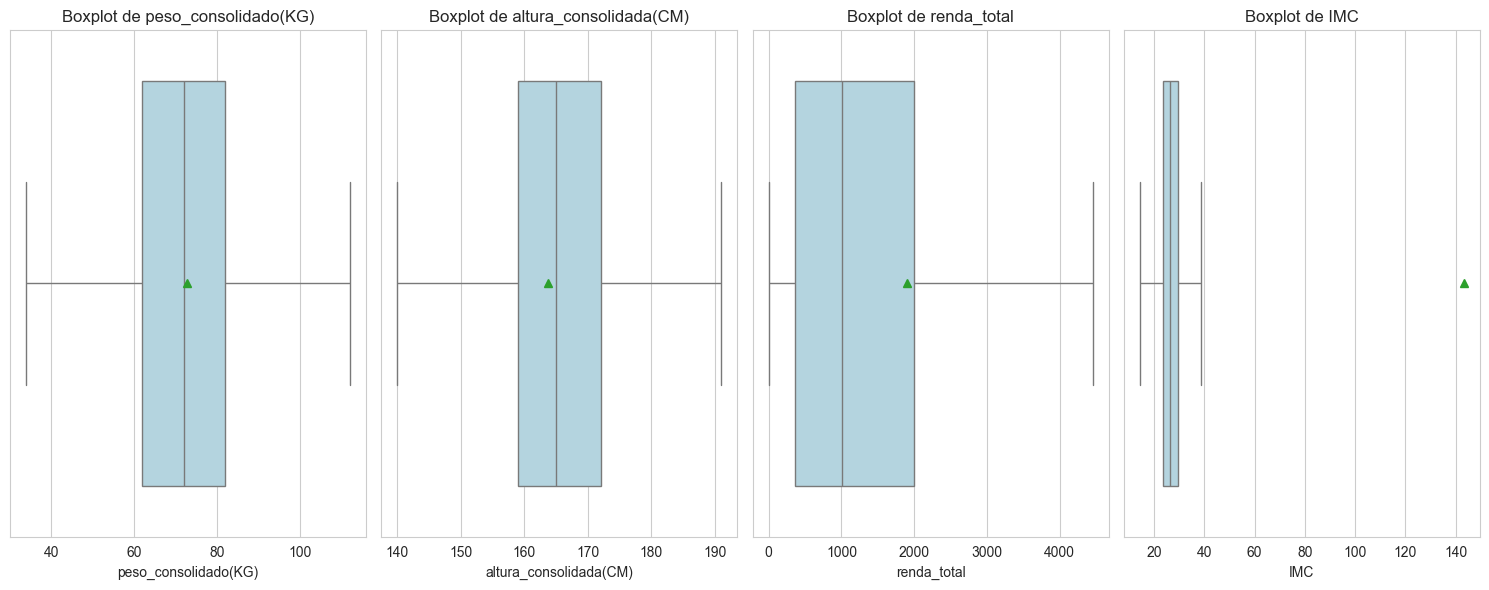

In [44]:
# Visualizando Outliers com Box Plots (Horizontal)
sns.set_style("whitegrid")

fig, axes = plt.subplots(1, len(colunas_numericas), figsize=(15, 6))  # Mudança para horizontal

for i, coluna in enumerate(colunas_numericas):
    sns.boxplot(x=df[coluna], ax=axes[i], color='lightblue', showmeans=True, showfliers=False, orient='h')  # Adicionando 'orient='h'
    axes[i].set_title(f'Boxplot de {coluna}')
    axes[i].set_xlabel(coluna)

plt.tight_layout()
plt.show()

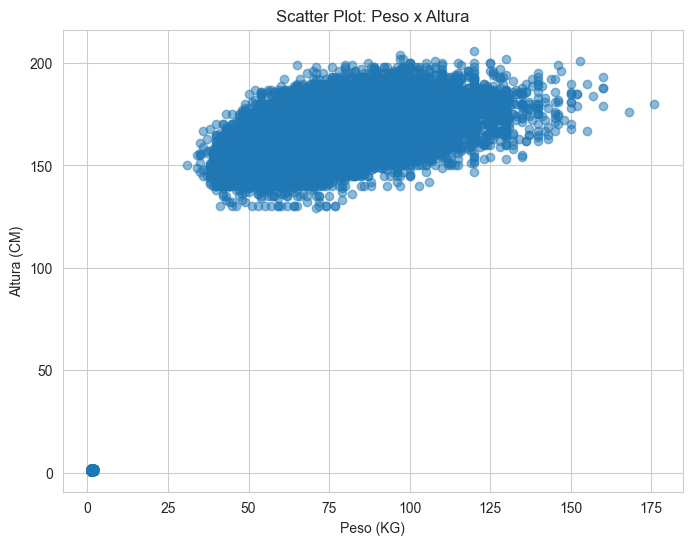

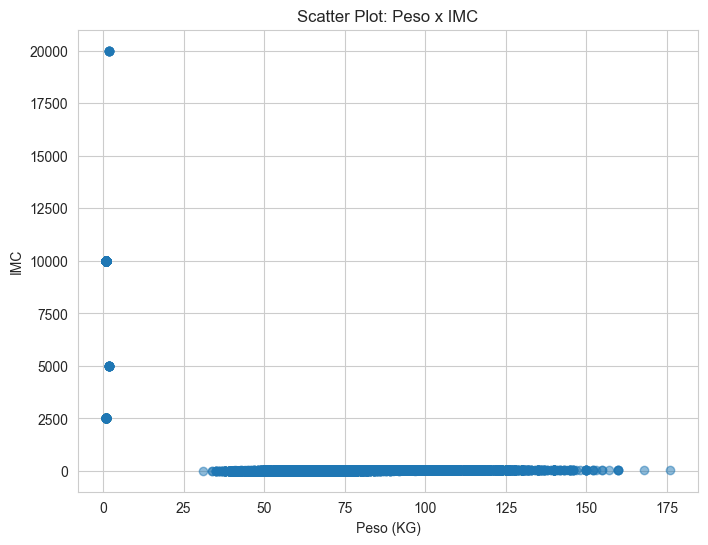

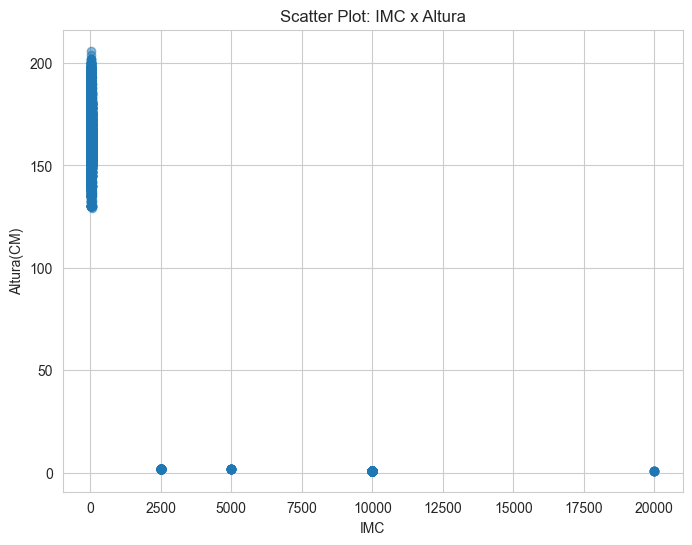

In [45]:
# Visualizando Outliers com Scatter Plots
# Peso x Altura
plt.figure(figsize=(8, 6))
plt.scatter(df['peso_consolidado(KG)'], df['altura_consolidada(CM)'], alpha=0.5)
plt.xlabel('Peso (KG)')
plt.ylabel('Altura (CM)')
plt.title('Scatter Plot: Peso x Altura')
plt.show()

# Peso x IMC
plt.figure(figsize=(8, 6))
plt.scatter(df['peso_consolidado(KG)'], df['IMC'], alpha=0.5)
plt.xlabel('Peso (KG)')
plt.ylabel('IMC')
plt.title('Scatter Plot: Peso x IMC')
plt.show()

# IMC x Altura
plt.figure(figsize=(8, 6))
plt.scatter(df['IMC'], df['altura_consolidada(CM)'], alpha=0.5)
plt.xlabel('IMC')
plt.ylabel('Altura(CM)')
plt.title('Scatter Plot: IMC x Altura')
plt.show()

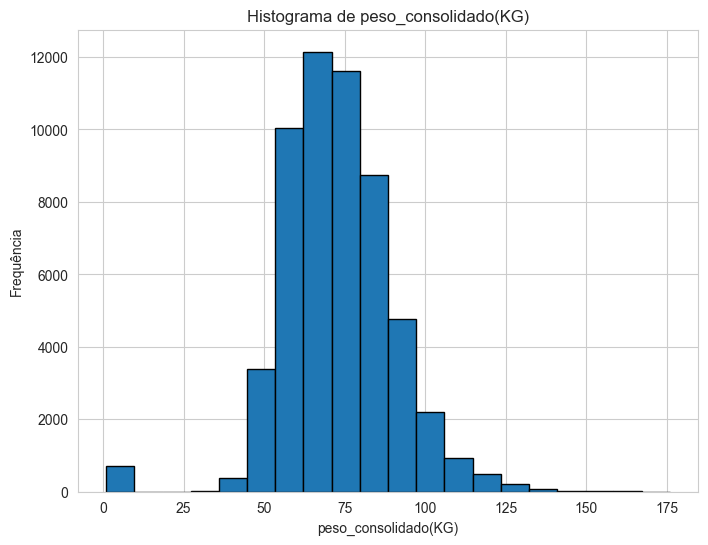

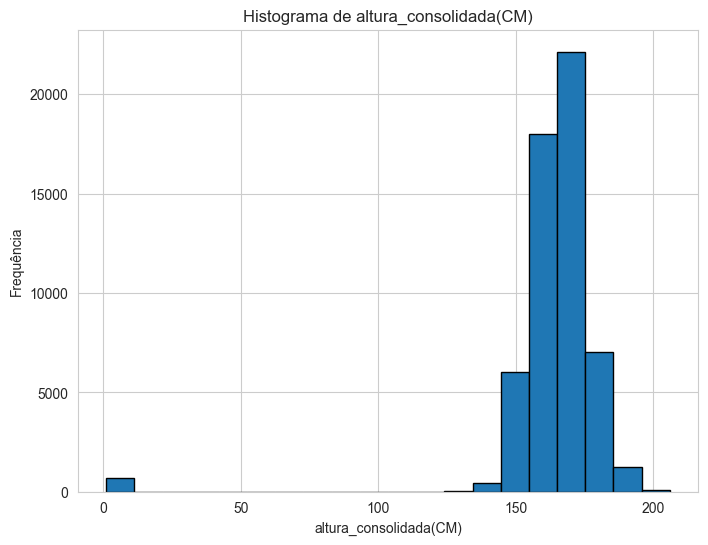

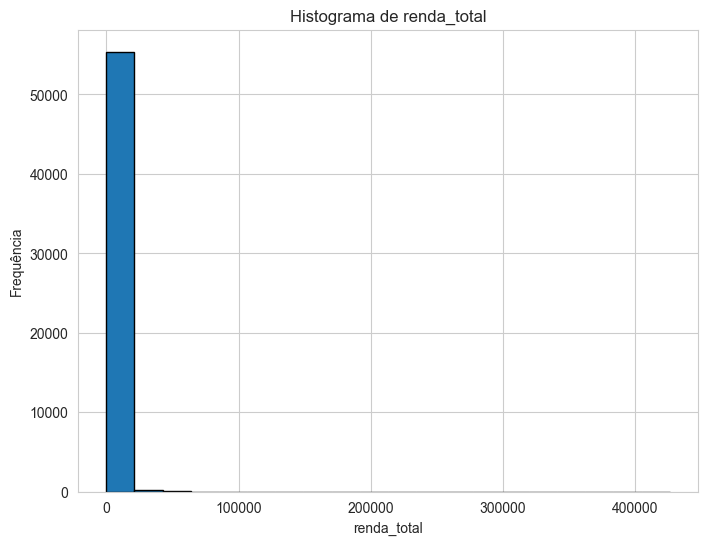

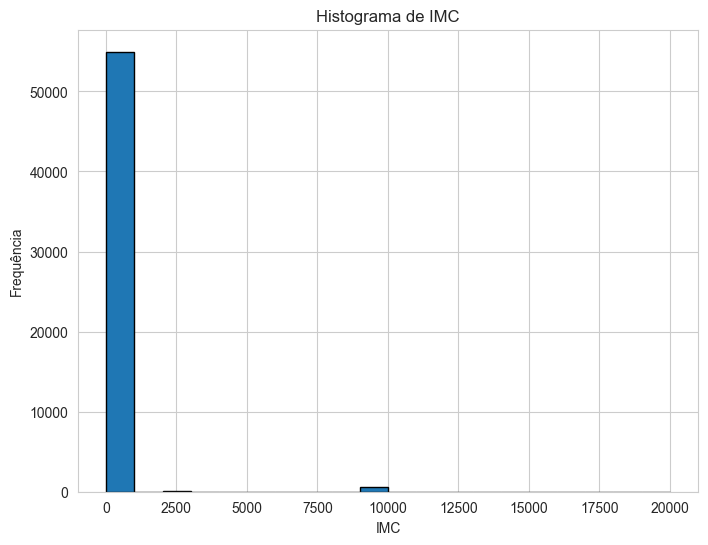

In [46]:
# Visualizando Outliers com Histogramas
for coluna in colunas_numericas:
    plt.figure(figsize=(8, 6))
    plt.hist(df[coluna], bins=20, edgecolor='black')
    plt.xlabel(coluna)
    plt.ylabel('Frequência')
    plt.title(f'Histograma de {coluna}')
    plt.show()


In [47]:
# Removendo Outliers (Combinando Z-score e IQR)
for coluna in colunas_numericas:
    # 1. Remover outliers grosseiros com Z-score
    outliers_zscore = detectar_outliers_zscore(df[coluna])
    df = df[~df[coluna].isin(outliers_zscore)]

    # 2. Remover outliers restantes com IQR
    outliers_iqr = detectar_outliers_iqr(df[coluna])
    df = df[~df[coluna].isin(outliers_iqr)]

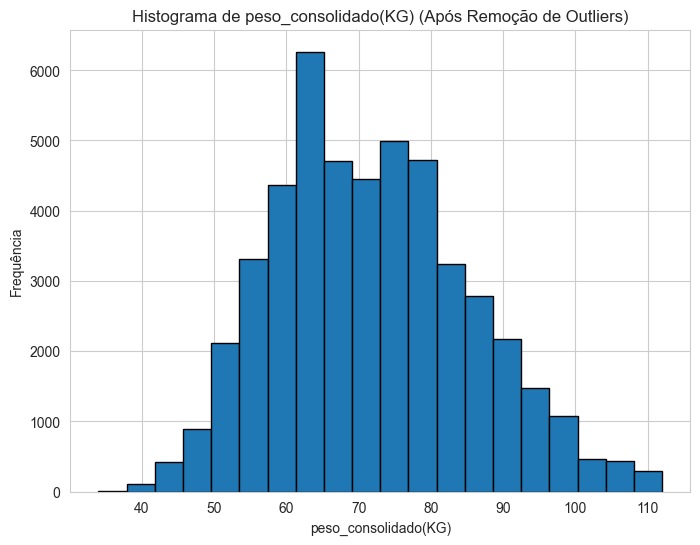

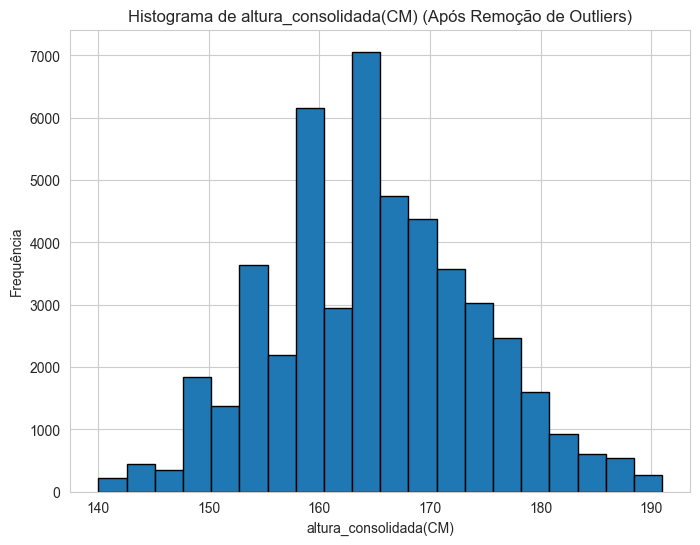

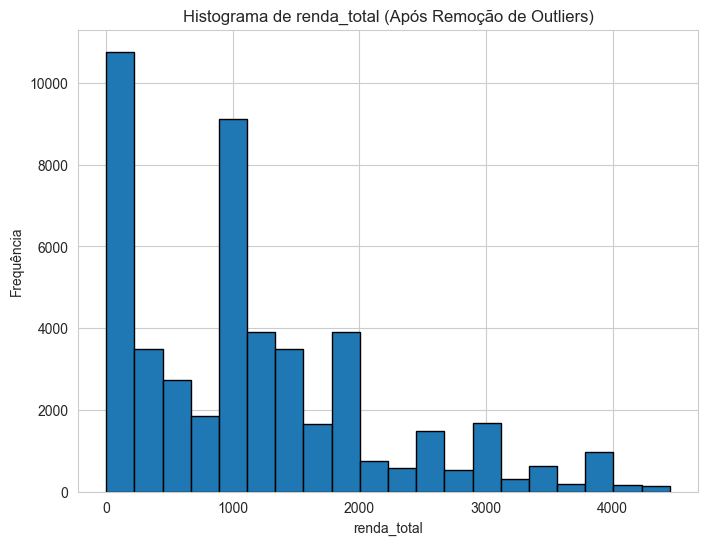

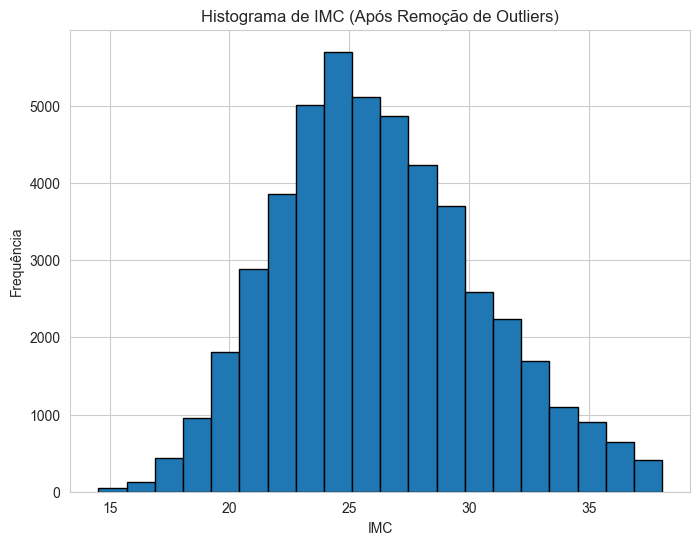

In [48]:
# Verificando se os outliers foram removidos
for coluna in colunas_numericas:
    plt.figure(figsize=(8, 6))
    plt.hist(df[coluna], bins=20, edgecolor='black')
    plt.xlabel(coluna)
    plt.ylabel('Frequência')
    plt.title(f'Histograma de {coluna} (Após Remoção de Outliers)')
    plt.show()

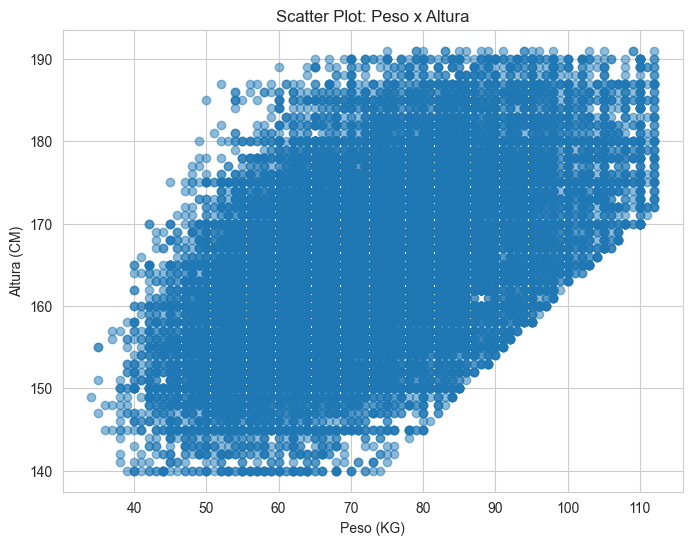

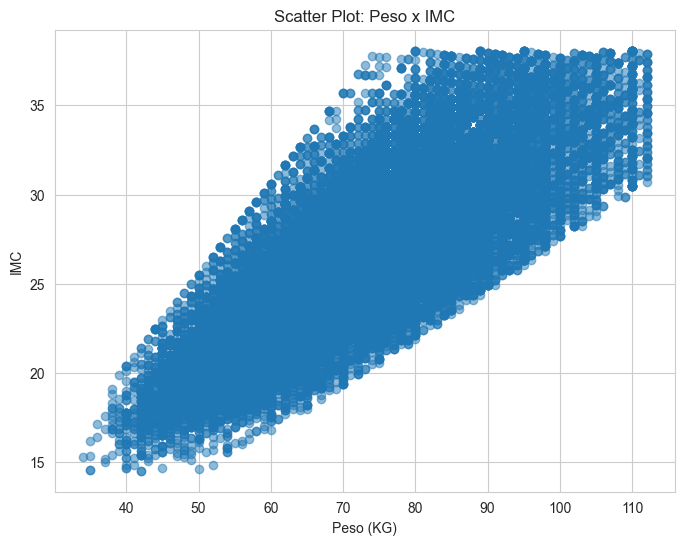

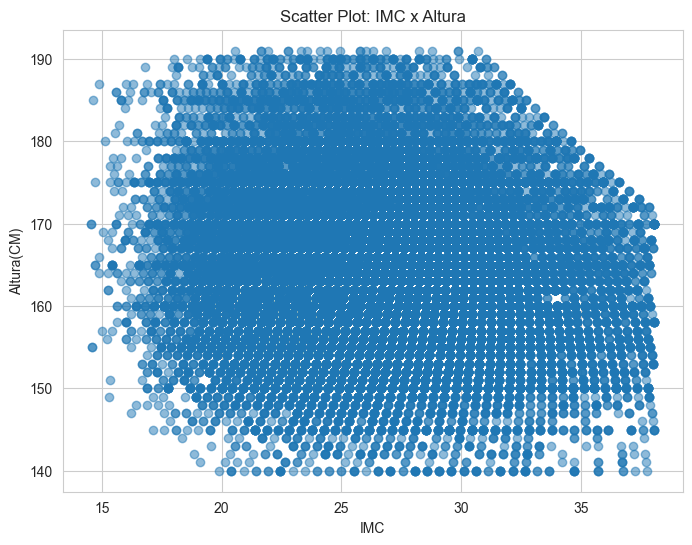

In [49]:
# Visualizando Outliers com Scatter Plots
# Peso x Altura
plt.figure(figsize=(8, 6))
plt.scatter(df['peso_consolidado(KG)'], df['altura_consolidada(CM)'], alpha=0.5)
plt.xlabel('Peso (KG)')
plt.ylabel('Altura (CM)')
plt.title('Scatter Plot: Peso x Altura')
plt.show()

# Peso x IMC
plt.figure(figsize=(8, 6))
plt.scatter(df['peso_consolidado(KG)'], df['IMC'], alpha=0.5)
plt.xlabel('Peso (KG)')
plt.ylabel('IMC')
plt.title('Scatter Plot: Peso x IMC')
plt.show()

# IMC x Altura
plt.figure(figsize=(8, 6))
plt.scatter(df['IMC'], df['altura_consolidada(CM)'], alpha=0.5)
plt.xlabel('IMC')
plt.ylabel('Altura(CM)')
plt.title('Scatter Plot: IMC x Altura')
plt.show()

In [50]:
df['Diagnostico_Depressao'].value_counts()

Diagnostico_Depressao
2.0    44040
1.0     4269
Name: count, dtype: int64

In [52]:
# Salvar o DataFrame sem outliers
df.to_csv(r'C:\Users\maype\OneDrive - sga.pucminas.br\Área de Trabalho\Faculdade\projects\A Machine Learning Approach to Characterizing Depression in Brazilian Adult\Data\Bases Modificadas\df_sem_outliers.csv', index=False)